In [2]:
import pandas as pd


In [3]:
df=pd.read_csv("data2.csv")

In [4]:
df.shape


(891, 12)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

univariate analysis

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#plotting histogram of the age variable 
df.plot.hist()

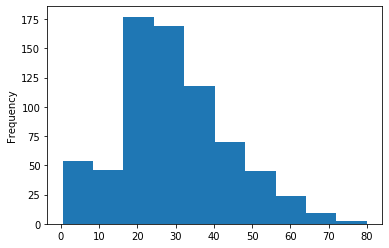

In [9]:
df["Age"].plot.hist()

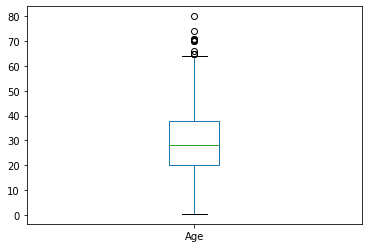

In [10]:
df["Age"].plot.box()

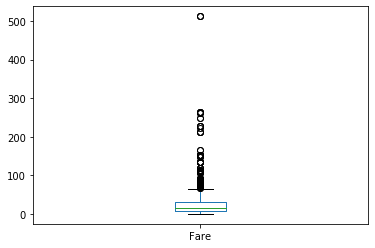

In [11]:
df["Fare"].plot.box()

UNIVARIATE ANALYSIS OF CATEGORICAL VARIABLE


In [12]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [13]:
#create percentage from frequencies
df["Sex"].value_counts()/len(df["Sex"])

male      0.647587
female    0.352413
Name: Sex, dtype: float64

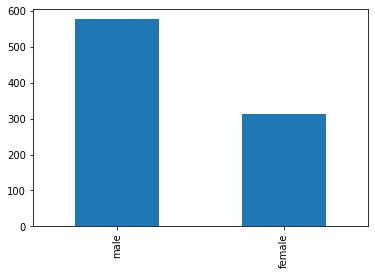

In [15]:
#creating a bar plot for sex frequencies
df['Sex'].value_counts().plot.bar()

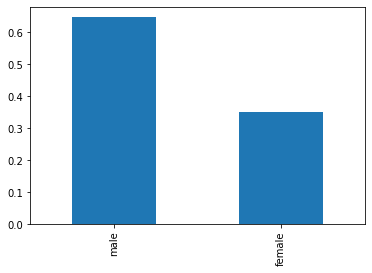

In [19]:
(df["Sex"].value_counts()/len(df["Sex"])).plot.bar()

In [20]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

 #CONTINOUS - CONTINOUS BIVARIATE ANALYSIS

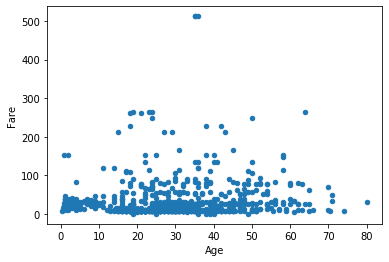

In [21]:
#SCANTTER PLOT BETWEEN AGE AND FARE VARIABLES
df.plot.scatter("Age","Fare")

In [22]:
#correlation between all the variables
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [23]:
#calculating the corelation between age and fare specifically
df["Age"].corr(df["Fare"])

0.09606669176903887

#CATEGORICAL-CONTINUOUS-ANALYSIS

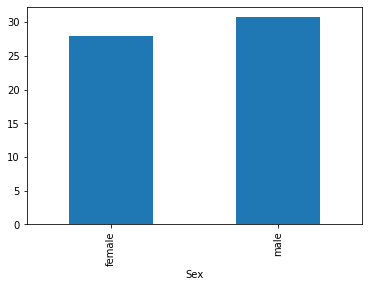

In [24]:
df.groupby("Sex")["Age"].mean().plot.bar()

In [25]:
#importing the scipy library for test

In [26]:
from scipy.stats import ttest_ind

In [27]:
males=df[df["Sex"]=="male"]
females=df[df["Sex"]=="female"]

In [28]:
ttest_ind(males["Age"],females["Age"],nan_policy="omit")

Ttest_indResult(statistic=2.499206354920835, pvalue=0.012671296797014266)

#Importing  chi_Square contiguous functions

In [29]:
from scipy.stats import chi2_contingency

#Type3 Categorical-Categorical Bivariate Analysis

In [30]:
pd.crosstab(df["Sex"],df["Survived"])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [31]:
#using the chi_contingency function which was imported before for measuring two categorical variable 

In [32]:
chi2_contingency(pd.crosstab(df['Sex'],df['Survived']))

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 120.52525253],
        [355.52525253, 221.47474747]]))